## Introduction to Julia

We will be using Julia for understanding statistics, and not the other way around. In this class we will discuss the 
coin toss problem. If we toss a coin, n times, there are $2^n$ possible outcomes. And each of these are equally likely.
If we want to know how many of these are exactly having k heads, it is merely $n \choose k $. So the probability of getting
exactly k heads, and n - k tails, is given by

\begin{align}
 p &= \frac{1}{2^n} {n \choose k } \\
   &= \frac{1}{1024} \frac{ 10 \times 9 \times 8 \times 7 \times 6 } {1 \times 2 \times 3 \times 4 \times 5 } \\
   &= \frac{3 \times 2 \times 7 \times 6 }{1024} \\
   &= \frac{252}{1024} 
\end{align}

In [1]:
binomial(10, 5)

252

In [2]:
binomial(10, 5)/2^10

0.24609375

Writing one line functions in julia is very easy. 

In [3]:
f(x) = 3x^2 + 5x + 6

f (generic function with 1 method)

In [4]:
f(6)

144

We want to know how much this deviats from reality in practise. The ideal situation of getting 252/1024 never really happens. But we need to be prepared for variances. How can we assess these. Let us conduct an experiment to do this.

In [5]:
toss = rand(0:1)

1

In [6]:
expt = rand(0:1, 10)

10-element Array{Int64,1}:
 1
 1
 0
 1
 1
 0
 1
 0
 0
 0

In [7]:
sample = rand(0:1, 5, 10)

5x10 Array{Int64,2}:
 1  1  0  0  0  1  0  0  0  0
 1  1  0  1  1  0  0  0  0  1
 1  1  1  0  1  1  0  1  0  0
 1  0  0  1  1  1  1  1  1  1
 1  0  0  0  1  1  1  0  0  1

In [8]:
apparatus = ones(Int64, 10, 1)

10x1 Array{Int64,2}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1

In [9]:
measurement = sample * apparatus

5x1 Array{Int64,2}:
 3
 5
 6
 8
 5

We would like to now actually count each number, how many times it appeared

In [10]:
h = hist(measurement, [-1:10])[2]

11x1 Array{Int64,2}:
 0
 0
 0
 1
 0
 2
 1
 0
 1
 0
 0

Let us do some plotting, for this, we will use Julia package Gadly. You should have already installed them on Julia terminal using:

```
Pkg.add("Gadfly")
```

In [11]:
using Gadfly

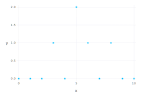

In [12]:
plot(x=[0:10], y=h)

This is not fun enough, we want to change the number of samples, and see how things look. For this you should have
already installed package called Interact.

```
Pkg.add("Interact")
```

In [13]:
using Interact

Slider{Int64}([Input{Int64}] 50,"S",50,1:100)

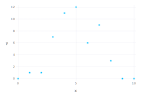

In [14]:
@manipulate for S in 1:100 
    samples = rand(0:1, S, 10)
    measurement = samples * apparatus
    h = hist(measurement, [-1:10])[2]
    plot (x=[0:10], y=h)
end

Now to be able to compare each other nicely, let us just normalize this.

Slider{Int64}([Input{Int64}] 50,"S",50,1:100)

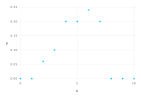

In [15]:
@manipulate for S in 1:100 
    samples = rand(0:1, S, 10)
    measurement = samples * apparatus
    h = hist(measurement, [-1:10])[2]/S
    plot (x=[0:10], y=h)
end

Now we want to actually say, compare against the ideal case. 

Slider{Int64}([Input{Int64}] 5000,"S",5000,1:10000)

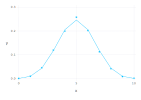

In [16]:
@manipulate for S in 1:10000 
    samples = rand(0:1, S, 10)
    measurement = samples * apparatus
    h = hist(measurement, [-1:10])[2]/S
    plot (layer(x=[0:10], y=h, Geom.point), layer(x=[0:10],y=[binomial(10, r)/2^10 for r in 0:10], Geom.line))
end

In [17]:
function measure(S) 
    samples = rand(0:1, S, 10)
    measurement = samples * apparatus
    hist(measurement, [-1:10])[2]/S
end

measure (generic function with 1 method)

In [18]:
ideal = [ binomial(10, r) for r in 0:10]/2^10

11-element Array{Float64,1}:
 0.000976563
 0.00976563 
 0.0439453  
 0.117188   
 0.205078   
 0.246094   
 0.205078   
 0.117188   
 0.0439453  
 0.00976563 
 0.000976563

In [19]:
err = [ norm(measure(S) - ideal) for S in 1:100]

100-element Array{Any,1}:
 0.827049 
 0.594921 
 0.36142  
 0.556325 
 0.25454  
 0.377427 
 0.330745 
 0.347179 
 0.549692 
 0.31602  
 0.192712 
 0.297984 
 0.304141 
 ⋮        
 0.0587674
 0.14398  
 0.100877 
 0.132264 
 0.101754 
 0.0601703
 0.12022  
 0.0896572
 0.128412 
 0.0605911
 0.0590042
 0.064875 

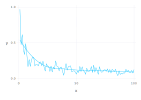

In [20]:
plot(x=[1:100], y=[ norm(measure(S) - ideal) for S in 1:100], Geom.line, Geom.smooth)

In [21]:
using DataFrames

In [22]:
using DataArrays

In [23]:
exp(S) = (rand(0:1, S, 10) * apparatus)[1:end]

exp (generic function with 1 method)

In [24]:
df = DataFrame()

""


In [25]:
df[:id] = 1:10000

1:10000

In [26]:
df[:heads] = (@data exp(10000))

10000-element DataArray{Int64,1}:
 7
 5
 4
 4
 5
 4
 9
 6
 9
 8
 5
 6
 4
 ⋮
 3
 5
 6
 4
 7
 3
 3
 6
 6
 6
 4
 5

In [27]:
df

,id,heads
1,1,7
2,2,5
3,3,4
4,4,4
5,5,5
6,6,4
7,7,9
8,8,6
9,9,9
10,10,8


In [28]:
groupby(df, :heads) |> [length]

,heads,id_length
1,0,11
2,1,112
3,2,449
4,3,1134
5,4,2042
6,5,2428
7,6,2123
8,7,1125
9,8,452
10,9,105


In [29]:
Pkg.add("RDatasets")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of RDatasets
INFO: Use `Pkg.update()` to get the latest versions of your packages
